# Линейная регрессия
__Суммарное количество баллов: 10__

__Решение отправлять на `ml.course.practice@gmail.com`__

__Тема письма: `[ML][MS][HW03] <ФИ>`, где вместо `<ФИ>` указаны фамилия и имя__

In [2]:
from sklearn.datasets import make_blobs, make_moons
from sklearn.model_selection import train_test_split
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib
import copy

In [3]:
def read_data(path="boston.csv"):
    dataframe = np.genfromtxt(path, delimiter=",", skip_header=15)
    np.random.seed(42)
    np.random.shuffle(dataframe)
    X = dataframe[:, :-1]
    y = dataframe[:, -1]
    return X, y

In [4]:
def generate_synthetic(size:int, dim=6, noise=0.1):
    X = np.random.randn(size, dim)
    w = np.random.randn(dim + 1)
    noise = noise * np.random.randn(size)
    y = X.dot(w[1:]) + w[0] + noise
    return X, y

### Задание 1 (1 балл)
Для начала нужно понять, какую метрику для ошибки будем использовать. В нашем случае нам подойдет стандартная метрика MSE. Также чтобы оценить качество модели нам понадобится метрика $R^2$. Реализуйте обе эти метрики.

In [5]:
def mse(y_true:np.ndarray, y_predicted:np.ndarray):
    return np.mean((y_true-y_predicted) ** 2)

def r2(y_true:np.ndarray, y_predicted:np.ndarray):
    u = np.sum((y_predicted-y_true) ** 2)
    y_mean = np.mean(y_true)
    v = np.sum((y_mean - y_true) ** 2)
    return 1 - u / v

### Задание 2 (3 балла)
Теперь реализуем линейную регрессию при помощи явного решения задачи минимизации. 

#### Методы
`fit(X, y)` - решает задачу минимизации $\arg\min_{w, b}\sum ((w\cdot x + b) - y)^2$. 

`predict(X)` - строит предсказание `y` для объектов из `X`.

In [6]:
class NormalLR:
    def __init__(self):
        self.w = np.array([])
    
    def fit(self, X:np.ndarray, y:np.ndarray):
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        self.w = np.linalg.inv(X.T @ X) @ X.T @ y
    
    def predict(self, X:np.ndarray) -> np.ndarray:
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        return X @ self.w

In [7]:
X, y = generate_synthetic(1024)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [8]:
regr = NormalLR()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
print(f"MSE: {mse(y_test, y_pred)}, R2: {r2(y_test, y_pred)}")

MSE: 0.010789990406950495, R2: 0.9978895595606645


### Задание 3 (2 балла)
Теперь реализуем линейную регрессию с использованием градиентного спуска с larning rate `alpha` в течении `iterations` итераций. В задании необходимо использовать регуляризацию Лассо с коэффициентом `l`.

#### Методы
`fit(X, y)` - приближает решение задачи минимизации $\arg\min_{w, b}\sum ((w\cdot x + b) - y)^2$ при помощи градиентного спуска. 


`predict(X)` - строит предсказание `y` для объектов из `X`.

In [9]:
class GradientLR:
    def __init__(self, alpha:float, iterations=10000, l=0.):
        self.alpha = alpha
        self.max_iter = iterations
        self.l = l
        self.w = np.array([])
        
def _grad(self):
    n = self.X.shape[0]
    grad_mse = 2 * self.X.T @ (self.X @ self.w - self.y) / n  
    grad_reg = self.l * np.sign(self.w) 
    return grad_mse + grad_reg
    
    def fit(self, X:np.ndarray, y:np.ndarray):
        
        self.X = np.hstack((np.ones((X.shape[0], 1)), X))
        self.y = y
        
        self.w = np.ones(self.X.shape[1])
        tol = 1e-16
        grad_0 = self._grad()
        grad_0 = grad_0.T @ grad_0  # squared grad norm
        
        for iter in range(self.max_iter):
            d = -self._grad()
            norm_d = d.T @ d
            
            if norm_d / grad_0 < tol:  # stopping criteria
                break    
                
            self.w = self.w + self.alpha * d  # gradient descent step
        
    def predict(self, X:np.ndarray):
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        return X @ self.w

In [10]:
def build_plot(X_train, y_train, X_test, y_test, step=0.00002, l_max=0.002):
    xs = np.arange(0.0, l_max, step)
    errors = []
    for x in xs:
        regr = GradientLR(0.1, iterations=10000, l=x)
        regr.fit(X_train, y_train)
        errors.append(mse(y_test, regr.predict(X_test)))
    plt.figure(figsize=(9, 4))
    plt.xlim(xs[0], xs[-1])
    plt.grid()
    plt.plot(xs, errors)
    plt.show()

In [11]:
X, y = generate_synthetic(1024)
X, X_val, y, y_val = train_test_split(X, y, train_size=0.9, shuffle=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True)

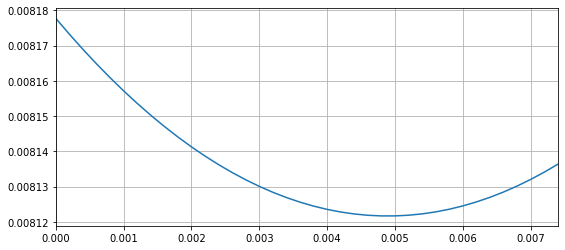

In [12]:
build_plot(X_train, y_train, X_val, y_val, step=0.0002, l_max=0.0075)

In [14]:
regr = GradientLR(0.1, iterations=10000, l=0.005)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
print(f"MSE: {mse(y_test, y_pred)}, R2: {r2(y_test, y_pred)}")

MSE: 0.00990643939153385, R2: 0.9981563350161915


In [15]:
regr.w

array([ 0.81455579,  0.10028088, -1.35927915,  0.33679742, -1.24831522,
       -0.00357213, -1.08618804])

### Задание 4 (2 балла)
Протесируйте оба метода на данных `boston.csv`, для градиентного спуска постройте график зависимости ошибки от коэффициента регуляризации. 

In [16]:
X, y = read_data()
X, X_val, y, y_val = train_test_split(X, y, train_size=0.9, shuffle=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True)

In [17]:
# minmax scaling
min_tr = np.min(X_train, axis=0)
max_tr = np.max(X_train, axis=0)
min_y = np.min(y_train)
max_y = np.max(y_train)
delta_minmax_y = max_y - min_y
delta_minmax = max_tr - min_tr

In [18]:
y_train = (y_train - min_y) / delta_minmax_y
y_val = (y_val - min_y) / delta_minmax_y
X_train = (X_train - min_tr) / delta_minmax
X_test = (X_test - min_tr) / delta_minmax
X_val = (X_val - min_tr) / delta_minmax

In [19]:
regr = NormalLR()
regr.fit(X_train, y_train)
# вернули игрик в нормальный масштаб
y_pred = regr.predict(X_test) * delta_minmax_y + min_y
print(f"MSE: {mse(y_pred, y_test)}, R2: {r2(y_test, y_pred)}")

MSE: 20491219.288693976, R2: 0.6461335821761052


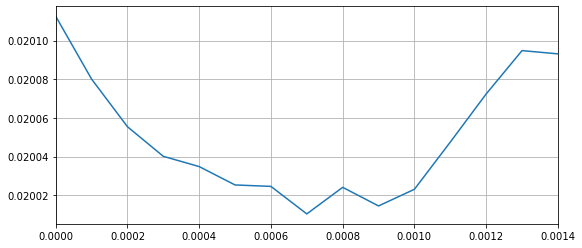

In [25]:
# здесь игрики и иксы отскейлены, поэтому mse в этом же масштабе
build_plot(X_train, y_train, X_val, y_val, step=0.0001, l_max=0.0015)

In [32]:
regr = GradientLR(0.1, iterations=10000, l=0.0007)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test) * delta_minmax_y + min_y
print(f"MSE: {mse(y_test, y_pred)}, R2: {r2(y_test, y_pred)}")

MSE: 20885479.513750743, R2: 0.639325034008927


### Задание 5 (2 балла)
Проинтерпритируйте полученные результаты. Опишите влияние каждого признака на результат предсказания.

0. w_o  --    bias
1. crim  --   per capita crime rate by town
2. zn    --   proportion of residential land zoned for lots over 25,000 sq.ft.
3. indus  --  proportion of non-retail business acres per town
4. chas  --   Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5. nox   --   nitric oxides concentration (parts per 10 million)
6. rm    --   average number of rooms per dwelling
7. age   --   proportion of owner-occupied units built prior to 1940
8. dis   --   weighted distances to five Boston employment centres
9. rad   --   index of accessibility to radial highways
10. tax   --   full-value property-tax rate per 10,000 dollars
11. ptratio -- pupil-teacher ratio by town
12. b    --    $1000(Bk - 0.63)^2$ where Bk is the proportion of blacks by town
13. lstat  --  % lower status of the population

y = medv  --   median value of owner-occupied homes in $'s

In [33]:
dicriptions = ['w_o','crim','zn','indus','chas','nox','rm','age','dis','rad','tax','ptratio','b','lstat'] 
w = np.round(regr.w, decimals=2)
for i, weight in enumerate(w):
    print(f'{dicriptions[i]: <7}  coef = {weight:>5}')

w_o      coef =  0.45
crim     coef = -0.09
zn       coef =  0.09
indus    coef =   0.0
chas     coef =  0.04
nox      coef = -0.14
rm       coef =  0.47
age      coef =  -0.0
dis      coef = -0.27
rad      coef =  0.07
tax      coef = -0.08
ptratio  coef =  -0.2
b        coef =  0.07
lstat    coef =  -0.4


- Лассо-регуляризация занулила признаки `indus` и `age`, т.е. они оказались наименее информативны для модели
- Остальные признаки можно разделить на группы с положительным и с отрицательным влиянием на `y` - медианную стоимость домов 

- Чем выше значение данных признаков, тем __выше__ стоимость жилья:<br>
    - `rm` -  среднее количество комнат в доме<br>
    - `zn` - доля земли<br>
    - `rad` - индекс доступности шоссе<br>
    - `b` - значение формулы <br>
    - `chas` - наличие реки рядом<br>


- Чем выше значение данных признаков, тем __ниже__ стоимость жилья:<br>
    - `lstat` -  доля населения низкого статуса <br>
    - `dis` - взвешенное расстояние до деловых центров Бостона<br>
    - `ptratio` - отношение количества учеников к количеству учителей<br>
    - `nox` - загрязнение воздуха<br>
    - `crim` - криминогенность<br>
    - `tax` - ставка налога на имущество<br>

Признаки в данных списках отсортированы и по убыванию 'силы' влияния на `y`